In [71]:
#coding:utf-8
import datetime as dt
import statsmodels.api as sm
import pandas as pd
import json
import sys
import string
import codecs
from copy import copy
from hashlib import sha1
import hmac
import matplotlib.dates as mdates
import records
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib.dates import datestr2num
import matplotlib.ticker as ticker
import dateutil
from collections import Counter
import seaborn as sb
%matplotlib inline


In [72]:
#导入表，重新命名列
df = pd.read_csv('starter_score_analyse2.csv')
df.columns = ['id','game_type_id','game_id','time','game_name',
          'team_id','team_no','team_name','avg_union_score',
          'min_union_score','max_union_score','mid_union_score',
          'avg_total_score','min_total_score','max_total_score',
          'mid_total_score','avg_ftime','min_ftime','max_ftime','mid_ftime']

#转换时间格式并去掉错误的数据

#df['time'] = df['time'].str.replace('2019-12-31 22:00:00','2019-6-29 22:00:00')
df['time'] = pd.to_datetime(df['time'])


df = df[df['time']<'2019-11-20 00:00:00']

#按照时间排序
df = df.sort_values(by = ['time'],ascending = True)
df.sample(5)

,id,game_type_id,game_id,time,game_name,team_id,team_no,team_name,avg_union_score,min_union_score,max_union_score,mid_union_score,avg_total_score,min_total_score,max_total_score,mid_total_score,avg_ftime,min_ftime,max_ftime,mid_ftime
2413,2415,7,377,2019-04-08 10:00:00,2019MakeX机器人挑战赛海口积分赛,6211,X023018,风影队,53,40,80,45,53,40,80,45,205,131,240,225
2265,2267,7,362,2019-07-13 08:00:00,2019 世界机器人大赛华东赛区,5329,X012418,韩博士金刚狼,120,115,125,120,203,125,270,208,227,205,240,232
2036,2038,7,349,2019-07-31 10:00:00,2019MakeX机器人挑战赛山东省选拔赛,6255,X007073,乙尚战队,80,75,85,80,180,175,185,180,235,230,240,235
3778,3780,7,456,2019-10-27 10:01:00,2019MakeX机器人挑战赛北京顺义积分赛,4645,X001162,X 烈焰之刃,159,110,170,170,330,320,340,330,190,145,235,199
1978,1980,7,349,2019-07-31 10:00:00,2019MakeX机器人挑战赛山东省选拔赛,6110,X013374,创基杜卓飞战队,45,45,45,45,115,95,135,115,239,238,240,239


In [73]:
# numeric_vars = ['avg_union_score','min_union_score','max_union_score','mid_union_score','avg_total_score','min_total_score','max_total_score','mid_total_score','avg_ftime','min_ftime','max_ftime','mid_ftime']
# samples = np.random.choice(df.shape[0], 500, replace = False)
# df_samp = df.loc[samples,:]

# g = sb.PairGrid(data = df_samp, vars = numeric_vars)
# g = g.map_diag(plt.hist, bins = 20);
# g.map_offdiag(plt.scatter, alpha = 1/5)

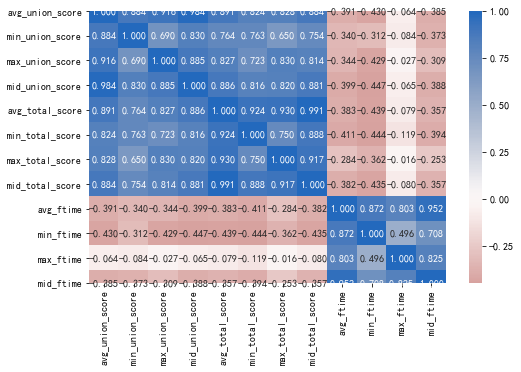

In [74]:
#热图， 时间和得分没有关系
plt.figure(figsize = [8, 5])
sb.heatmap(df_samp[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

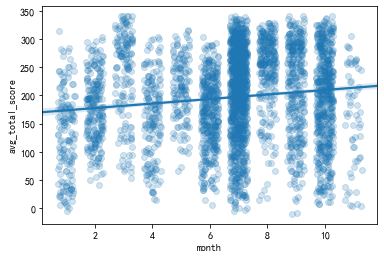

In [75]:
#Starter 自动赛平均
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
df.dtypes
sb.regplot(data = df,x= 'month',y = 'avg_total_score',x_jitter = 0.3,scatter_kws = {'alpha':1/5})

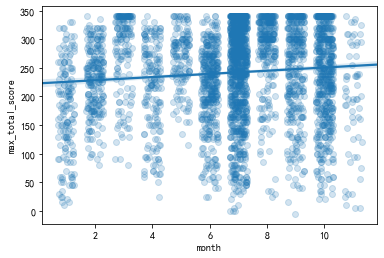

In [76]:
##Starter 自动赛平均
# df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
sb.regplot(data = df,x= 'month',y = 'max_total_score',x_jitter = 0.3,scatter_kws = {'alpha':1/5})

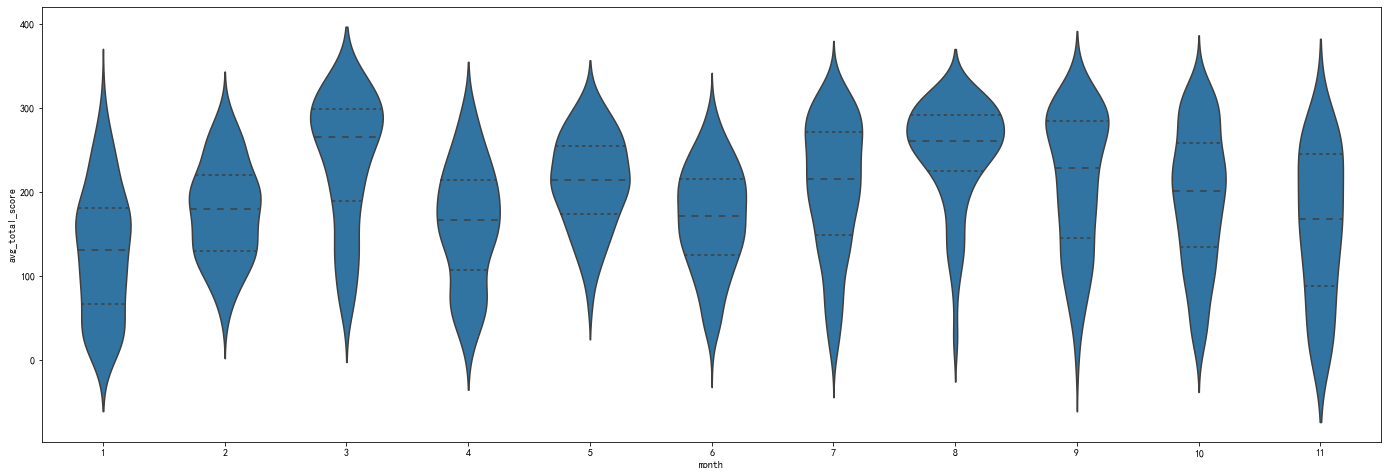

In [77]:
#按月份看一下数据分布
df['game_name'].astype('str')
base_color = sb.color_palette()[0]
# df2=  df[df['time'] > '2019/8/31 00:00:00']
ax2 = plt.figure(figsize = (24,8))
ax2 = sb.violinplot(data = df, x='month', y='avg_total_score',inner = 'quart',color = base_color)


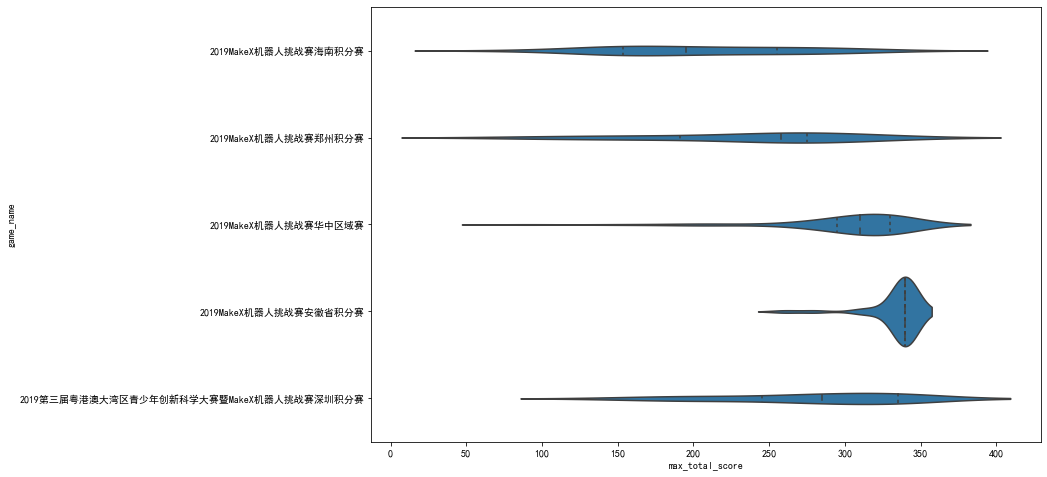

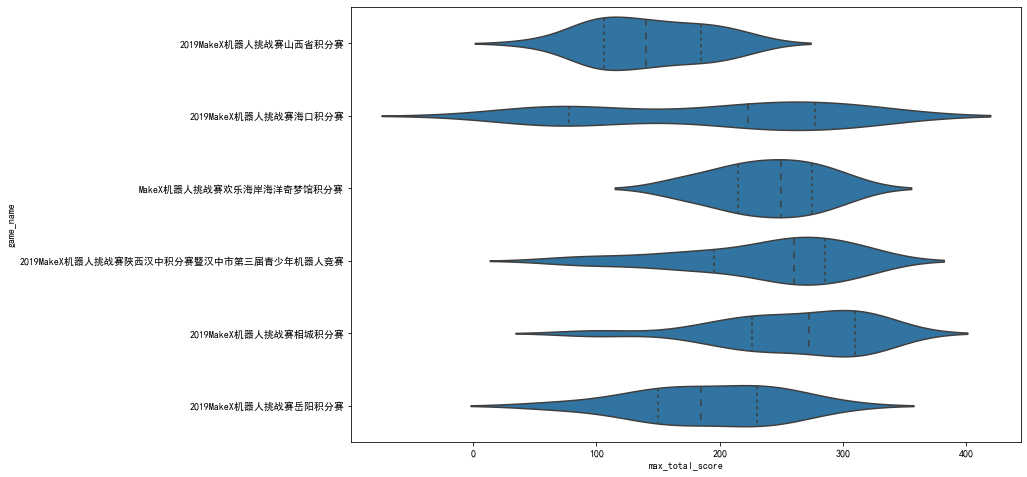

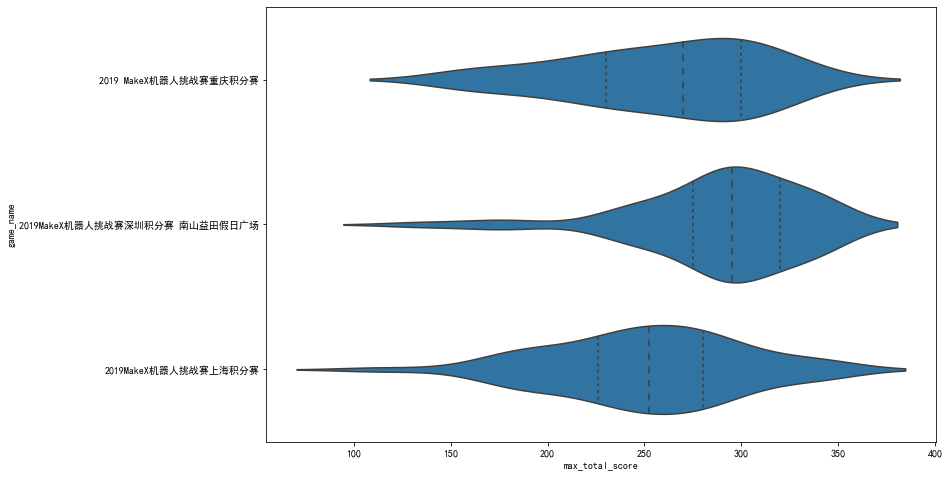

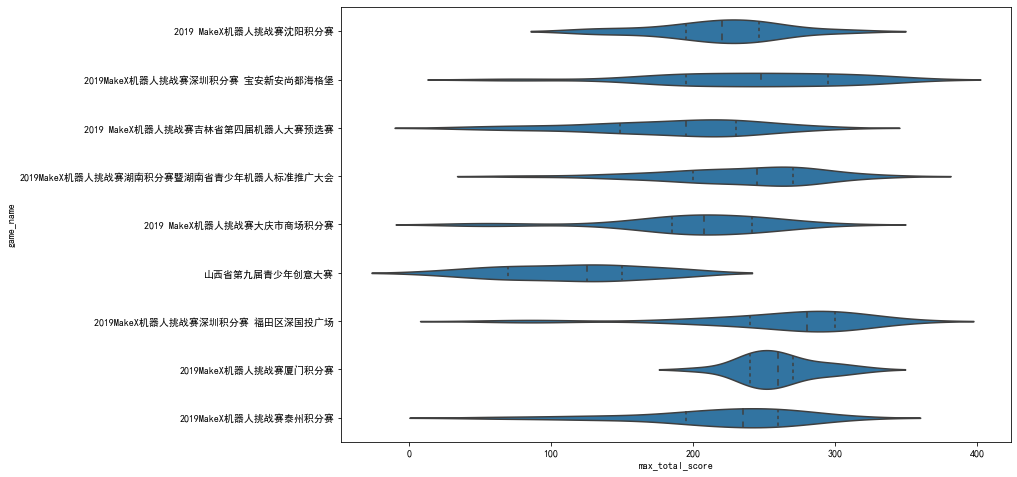

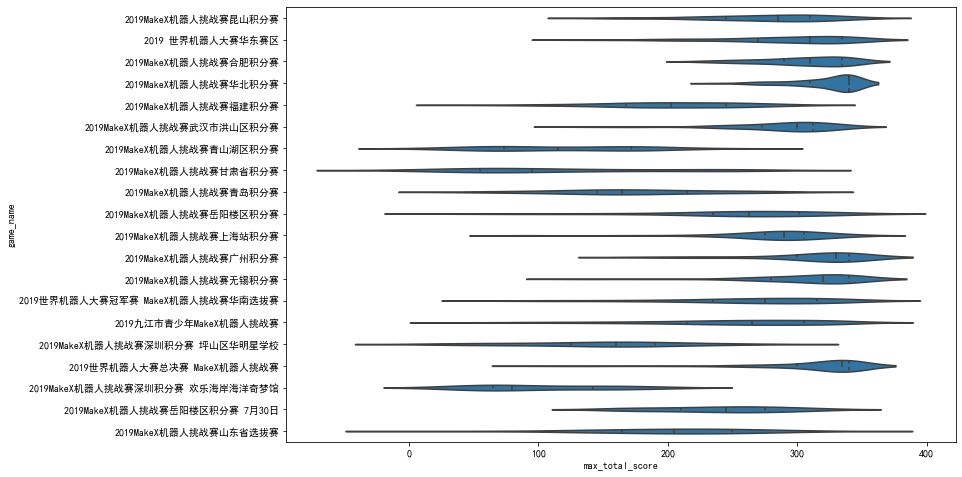

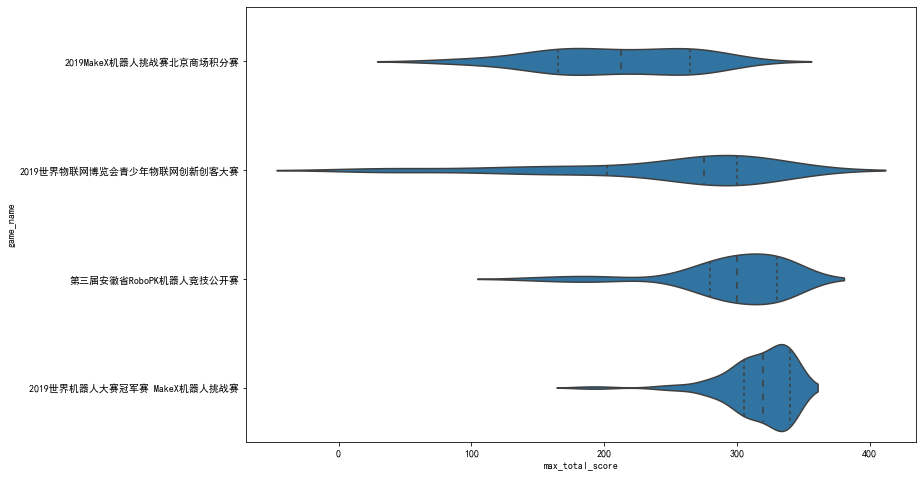

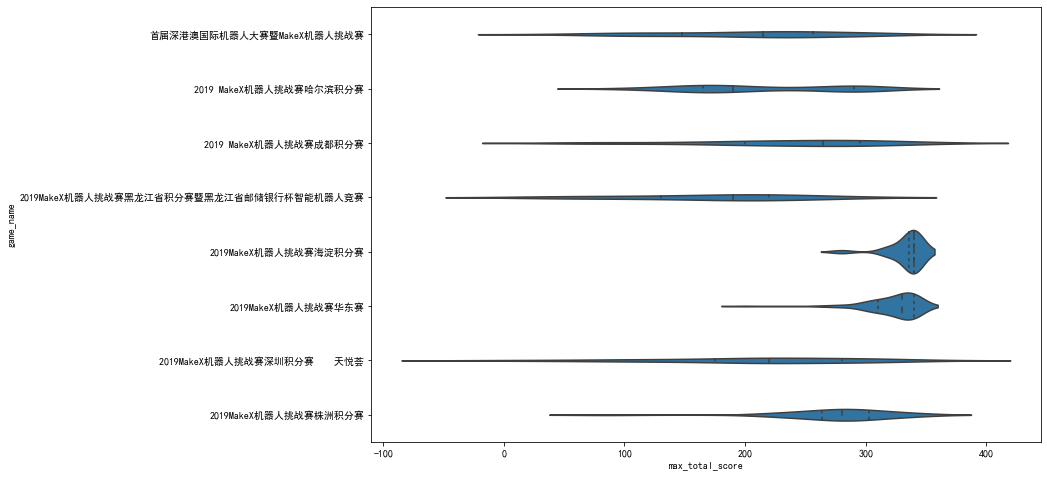

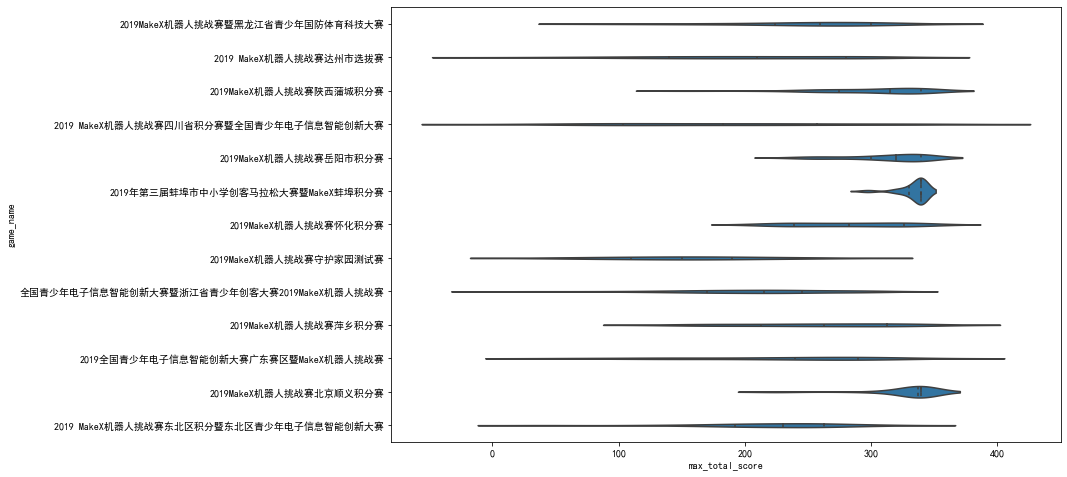

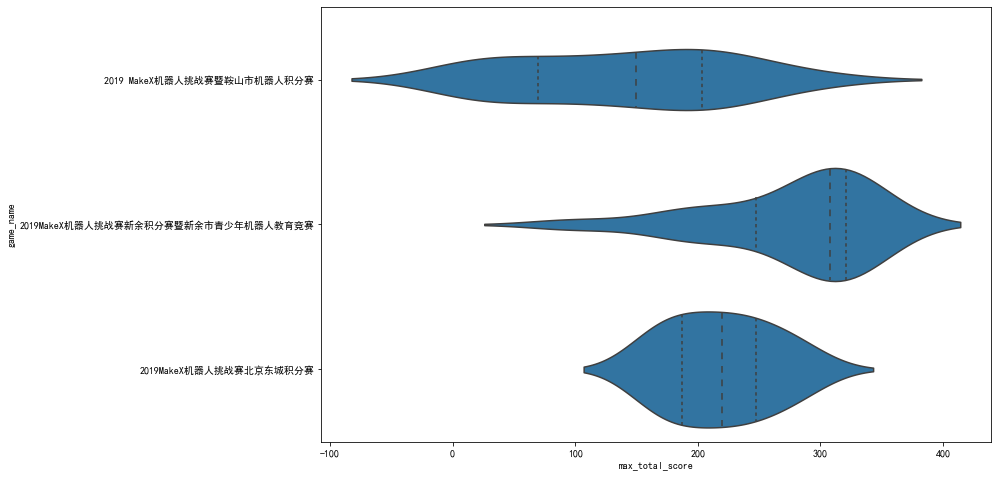

In [80]:
#11月
df['game_name'].astype('str')
base_color = sb.color_palette()[0]
for i in range (3,12):
    df2 = df[df['month'] == i]
    ax2 = plt.figure(figsize = (12,8))
    ax2 = sb.violinplot(data = df2, y='game_name', x='max_total_score',inner = 'quart',color = base_color)